### Import Libraries:

In [1]:
#import libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
from pandas import read_excel
from numpy import inf
from pandas.plotting import lag_plot
from statsmodels.tsa.stattools import adfuller         
from statsmodels.tsa.seasonal import seasonal_decompose  
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from sklearn.preprocessing import MinMaxScaler 
from numpy import set_printoptions
from sklearn.preprocessing import StandardScaler
from numpy import set_printoptions
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import statsmodels.formula.api as smf
import warnings
from math import sqrt
from pandas import read_csv
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.ar_model import AutoReg


### Import Dataset:

In [2]:
#import dataset

data_CO2emission = pd.read_excel("CO2 dataset.xlsx", sheet_name="Sheet1", parse_dates=True)
data_CO2emission.head()

,Year,CO2
0,1800,0.00568
1,1801,0.00561
2,1802,0.00555
3,1803,0.00548
4,1804,0.00542


### EDA (Exploratory Data Analysis) :

In [3]:
#shape
data_CO2emission.shape

(215, 2)

In [4]:
#data types
data_CO2emission.dtypes

Year      int64
CO2     float64
dtype: object

In [5]:
#info
data_CO2emission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    215 non-null    int64  
 1   CO2     215 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 3.5 KB


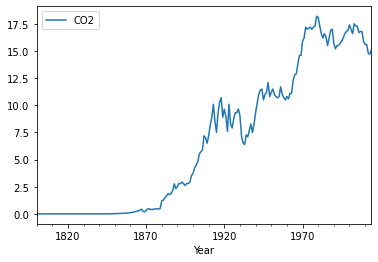

In [6]:
# Line Plot :
CO2emission = read_excel("CO2 dataset.xlsx", header=0, index_col=0, parse_dates=True )
CO2emission.plot()
pyplot.show()

#### Detecting of *Missing* and *Duplicate* Values:

In [7]:
# The method .copy() is used here so that any changes made in new DataFrame don't get reflected in the original one :
data = data_CO2emission.copy()

In [8]:
# coerce will introduce NA values for non numeric data in the columns :
data["CO2"] = pd.to_numeric(data["CO2"], errors="coerce")

In [9]:
#Count of duplicated rows
data[data.duplicated()].shape

(0, 2)

In [10]:
#Print the duplicated rows
data[data.duplicated()]

,Year,CO2


In [11]:
#No Duplicate Values are present in the dataset

<AxesSubplot:>

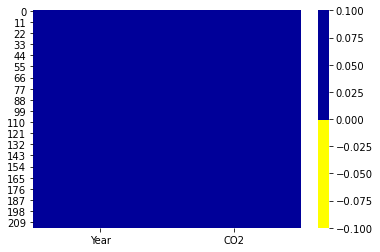

In [12]:
# Missing Values and Imputation :
import seaborn as sns

cols = data.columns 
colours = ['#ffff00','#000099'] 

sns.heatmap(data[cols].isnull(),
            cmap=sns.color_palette(colours))

In [13]:
#checking for null values
data[data.isnull().any(axis=1)].head()

,Year,CO2


In [14]:
#sum of null values
data.isnull().sum()

Year    0
CO2     0
dtype: int64

In [15]:
#No null Values are present in the dataset

#### Outlier Detection :

<AxesSubplot:>

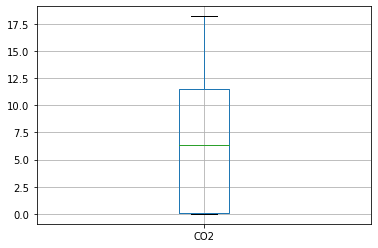

In [16]:
# Boxplot :
data.boxplot(column = "CO2")

In [17]:
#No Outliers are present in the dataset

In [18]:
# Descriptive Stats :
data["CO2"].describe()

count    215.000000
mean       6.741970
std        6.522437
min        0.001750
25%        0.041050
50%        6.390000
75%       11.500000
max       18.200000
Name: CO2, dtype: float64

#### Visualization :

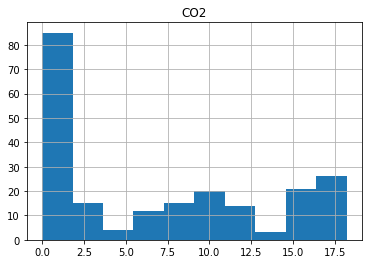

In [19]:
# Histogram of CO2 Emission :

data_histogram = read_excel("CO2 dataset.xlsx", header=0, index_col=0, parse_dates=True )
data_histogram.hist()
pyplot.show()

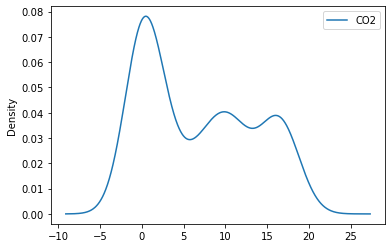

In [20]:
# Density Plot :

data_density = read_excel("CO2 dataset.xlsx", header=0, index_col=0, parse_dates=True )
data_density.plot(kind="kde")
pyplot.show()

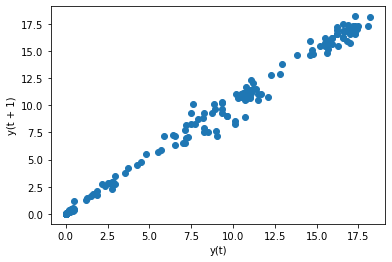

In [21]:
# Scatter Plot :

data_scatter = read_excel("CO2 dataset.xlsx", header=0, index_col=0, parse_dates=True )
lag_plot(data_scatter)
pyplot.show()

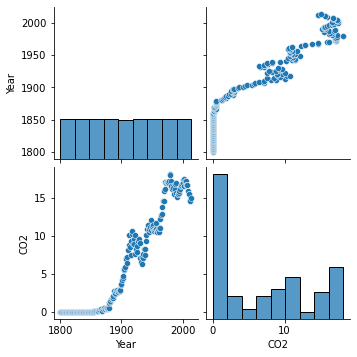

In [22]:
# Pair Plot :
sns.pairplot(data)

### Transformations :

#### Square Root Transform :

array([[<AxesSubplot:title={'center':'sqrt_CO2'}>]], dtype=object)

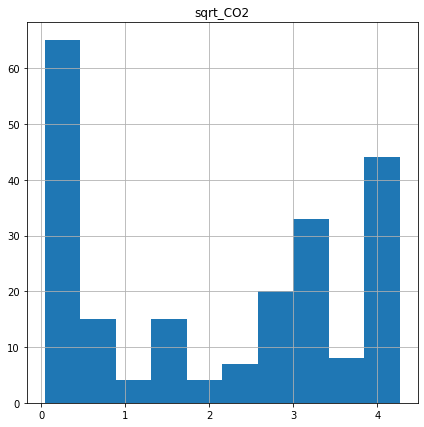

In [23]:
data_CO2 = pd.read_excel("CO2 dataset.xlsx", sheet_name="Sheet1", header=0, index_col=0, parse_dates=True)

#Square root transformation

data_CO2['sqrt_CO2'] = np.sqrt(data_CO2['CO2'])
data_CO2.hist(column='sqrt_CO2',figsize=(7,7))


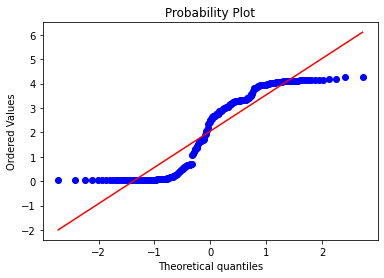

In [24]:
#Probability Plot(Square root transformation)

stats.probplot(data_CO2['sqrt_CO2'],plot=plt)
plt.show()

#### Log Transform :

array([[<AxesSubplot:title={'center':'Log_CO2'}>]], dtype=object)

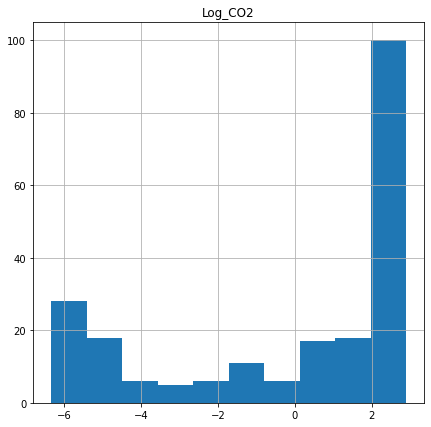

In [25]:
#Log Transformation

data_CO2['Log_CO2'] = np.log(data_CO2['CO2'])
data_CO2.hist(column='Log_CO2',figsize=(7,7))


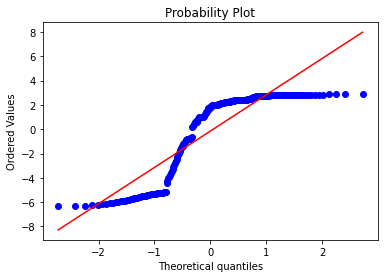

In [26]:
#Probability Plot(Log Transform)

stats.probplot(data_CO2['Log_CO2'],plot=plt)
plt.show()

#### Reciprocal Transform:

array([[<AxesSubplot:title={'center':'recp_CO2'}>]], dtype=object)

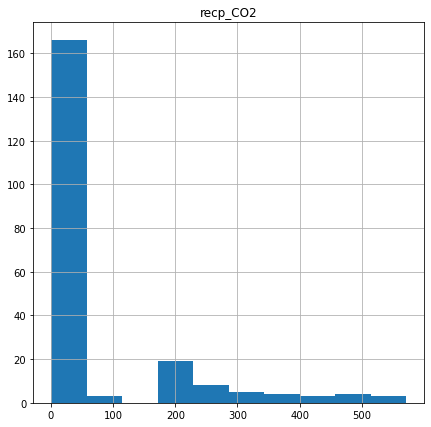

In [27]:
#Reciprocal Transformation

data_CO2['recp_CO2'] = np.reciprocal(data_CO2['CO2'])
data_CO2.hist(column='recp_CO2',figsize=(7,7))

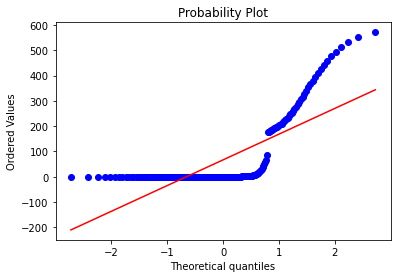

In [28]:
#Probability Plot(Reciprocal Transform)

stats.probplot(data_CO2['recp_CO2'],plot=plt)
plt.show()

#### Exponential transformation:

array([[<AxesSubplot:title={'center':'exp_CO2'}>]], dtype=object)

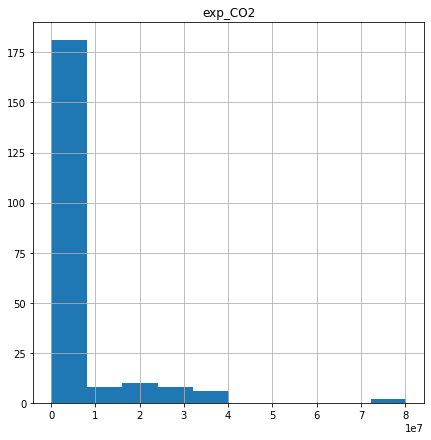

In [29]:
#Exponential transformation

data_CO2['exp_CO2'] = np.exp(data_CO2['CO2'])
data_CO2.hist(column='exp_CO2',figsize=(7,7))


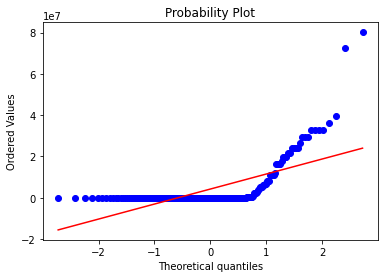

In [30]:
#Probability Plot(Exponential Transform)

stats.probplot(data_CO2['exp_CO2'],plot=plt)
plt.show()

In [31]:
data_CO2

,CO2,sqrt_CO2,Log_CO2,recp_CO2,exp_CO2
Year,,,,,
1800-01-01,0.00568,0.075366,-5.170804,176.056338,1.005696e+00
1801-01-01,0.00561,0.074900,-5.183205,178.253119,1.005626e+00
1802-01-01,0.00555,0.074498,-5.193957,180.180180,1.005565e+00
1803-01-01,0.00548,0.074027,-5.206650,182.481752,1.005495e+00
1804-01-01,0.00542,0.073621,-5.217659,184.501845,1.005435e+00
...,...,...,...,...,...
2010-01-01,15.60000,3.949684,2.747271,0.064103,5.956538e+06
2011-01-01,15.60000,3.949684,2.747271,0.064103,5.956538e+06
2012-01-01,14.80000,3.847077,2.694627,0.067568,2.676445e+06


In [32]:
#Create new dataframe df

df = data_CO2.drop(['sqrt_CO2', 'Log_CO2','recp_CO2','exp_CO2'], axis = 1)

In [33]:
df.head()

,CO2
Year,
1800-01-01,0.00568
1801-01-01,0.00561
1802-01-01,0.00555
1803-01-01,0.00548
1804-01-01,0.00542


### Stationarity :

In [34]:
# Test for Stationarity (Dickey Fuller Test) :


def TestStationaryAdfuller(df, cutoff = 0.01):
    df_test = adfuller(df, autolag = 'AIC')
    df_test_output = pd.Series(df_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    
    for key,value in df_test[4].items():
        df_test_output['Critical Value (%s)'%key] = value
    print(df_test_output)
    
    if df_test[1] <= cutoff:
        print("Failed to reject null hypothesis. Data is stationary")
    else:
        print("Failed to accept null hypothesis. Data is non-stationary ")

In [35]:
#Define Stationary Plot

def TestStationaryPlot(df):
    rol_mean = df.rolling(window = 20, center = False).mean()
    rol_std = df.rolling(window = 20, center = False).std()
    
    plt.plot(df, color = 'blue',label = 'Original Data')
    plt.plot(rol_mean, color = 'red', label = 'Rolling Mean')
    plt.plot(rol_std, color ='black', label = 'Rolling Std')
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)
    
    plt.xlabel('Time in Years', fontsize = 10)
    plt.ylabel('Total Emissions', fontsize = 10)
    plt.legend(loc='best', fontsize = 10)
    plt.title('Rolling Mean & Standard Deviation', fontsize = 10)
    plt.show(block= True)

In [36]:
# Test for Stationarity

#dataframe df

TestStationaryAdfuller(df.dropna(inplace=False))

Test Statistic                  -0.378463
p-value                          0.913633
#Lags Used                       0.000000
Number of Observations Used    214.000000
Critical Value (1%)             -3.461282
Critical Value (5%)             -2.875143
Critical Value (10%)            -2.574020
dtype: float64
Failed to accept null hypothesis. Data is non-stationary 


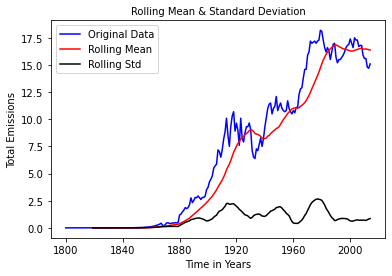

In [37]:
#Stationary Plot for Data

TestStationaryPlot(df)

In [38]:
#Above Data is non-stationary so we will use differencing
# Differencing :

df_first_difference = df - df.shift(1)

df_first_difference.head()

,CO2
Year,
1800-01-01,NaN
1801-01-01,-0.00007
1802-01-01,-0.00006
1803-01-01,-0.00007
1804-01-01,-0.00006


In [39]:
# test dickey fuller test on differenced data
# dataframe df_first_difference

TestStationaryAdfuller(df_first_difference.dropna(inplace=False))

Test Statistic                  -3.780005
p-value                          0.003119
#Lags Used                      15.000000
Number of Observations Used    198.000000
Critical Value (1%)             -3.463815
Critical Value (5%)             -2.876251
Critical Value (10%)            -2.574611
dtype: float64
Failed to reject null hypothesis. Data is stationary


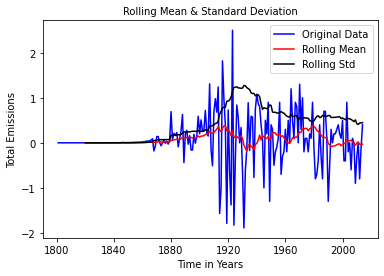

In [40]:
#Stationary Plot for first_difference data

TestStationaryPlot(df_first_difference)

In [41]:
#The first difference improves the stationarity of the series significantly. 
#Let us use the seasonal first order difference to remove the seasonality of the data and see how that impacts stationarity of the data.

In [42]:
#Seasonal First order differencing

data_CO2_seasonal_first_difference = df_first_difference - df_first_difference.shift(1)  

In [43]:
data_CO2_seasonal_first_difference.head()

,CO2
Year,
1800-01-01,NaN
1801-01-01,NaN
1802-01-01,0.00001
1803-01-01,-0.00001
1804-01-01,0.00001


In [44]:
## Again test dickey fuller test on data_CO2_seasonal_first_difference

TestStationaryAdfuller(data_CO2_seasonal_first_difference.dropna(inplace=False))

Test Statistic                  -5.536081
p-value                          0.000002
#Lags Used                      14.000000
Number of Observations Used    198.000000
Critical Value (1%)             -3.463815
Critical Value (5%)             -2.876251
Critical Value (10%)            -2.574611
dtype: float64
Failed to reject null hypothesis. Data is stationary


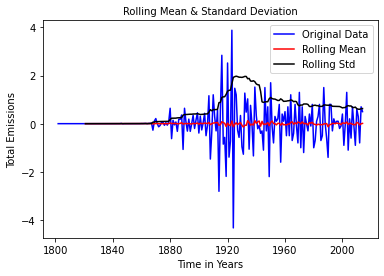

In [45]:
#Stationary Plot for seasonal_first_difference

TestStationaryPlot(data_CO2_seasonal_first_difference)

In [46]:
#We are considering this seasonal first difference for further analysis because it looks more stationary

### Time Series Decomposition Plot :

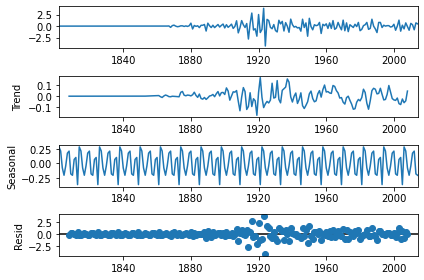

In [47]:
#Time Series Decomposition Plot for data_CO2_seasonal_first_difference

ts_decomposition = seasonal_decompose(data_CO2_seasonal_first_difference.dropna(),period=12)
ts_decomposition.plot()
plt.show()

### ACF Plot and PACF Plot :


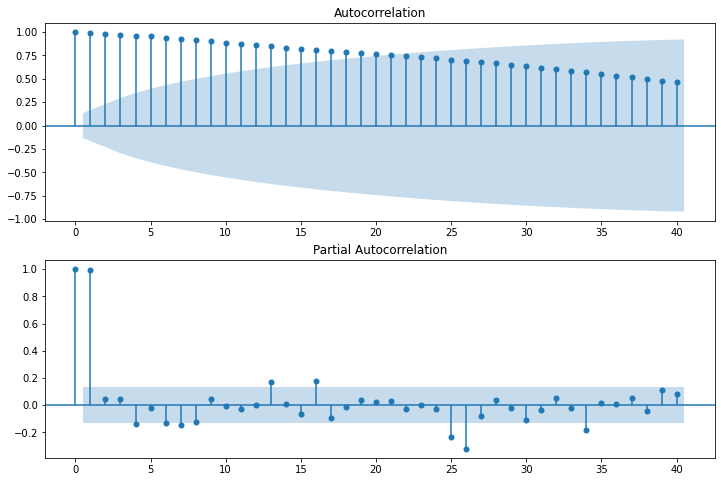

In [48]:
#ACF and PACF plot
#Non-Stationary Data

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data_CO2['CO2'],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data_CO2['CO2'],lags=40,ax=ax2)

In [49]:
# Correlation Matrix :
data_CO2emission.corr()

,Year,CO2
Year,1.000000,0.951243
CO2,0.951243,1.000000


#### Normalizing and Standardizing Dataset :

In [50]:
# Normalizing dataset :


array = data_CO2.dropna().values
scaler = MinMaxScaler(feature_range=(0,1))
rescaled = scaler.fit_transform(array)

# summarize transformed data
set_printoptions(precision=4)
print(rescaled[:,:])

[[2.1595e-04 7.9380e-03 1.2729e-01 3.0803e-01 4.9187e-11]
 [2.1211e-04 7.8278e-03 1.2594e-01 3.1188e-01 4.8309e-11]
 [2.0881e-04 7.7327e-03 1.2478e-01 3.1525e-01 4.7556e-11]
 ...
 [8.1317e-01 9.0080e-01 9.7764e-01 2.2092e-05 3.3373e-02]
 [8.0767e-01 8.9771e-01 9.7691e-01 2.2896e-05 3.0197e-02]
 [8.2965e-01 9.0998e-01 9.7981e-01 1.9742e-05 4.5049e-02]]


In [51]:
# Standardizing dataset :

array = data_CO2.dropna().values
scaler = StandardScaler().fit(array)
rescaled = scaler.transform(array)

# summarize transformed data
set_printoptions(precision=4)
print(rescaled[:,:])

[[-1.0352 -1.2476 -1.5114  0.8199 -0.3848]
 [-1.0352 -1.2479 -1.5151  0.8364 -0.3848]
 [-1.0352 -1.2482 -1.5184  0.8509 -0.3848]
 ...
 [ 1.2383  1.1292  0.8591 -0.5011 -0.1383]
 [ 1.2229  1.121   0.857  -0.5011 -0.1617]
 [ 1.2844  1.1536  0.8651 -0.5011 -0.052 ]]


### Time Series Forecasting Models :

### Non-stationary data:

In [52]:
#Splitting the data

Train = data_CO2.head(172)
Test = data_CO2.tail(43)

In [53]:
Train.head()

,CO2,sqrt_CO2,Log_CO2,recp_CO2,exp_CO2
Year,,,,,
1800-01-01,0.00568,0.075366,-5.170804,176.056338,1.005696
1801-01-01,0.00561,0.074900,-5.183205,178.253119,1.005626
1802-01-01,0.00555,0.074498,-5.193957,180.180180,1.005565
1803-01-01,0.00548,0.074027,-5.206650,182.481752,1.005495
1804-01-01,0.00542,0.073621,-5.217659,184.501845,1.005435


In [54]:
Test.head()

,CO2,sqrt_CO2,Log_CO2,recp_CO2,exp_CO2
Year,,,,,
1972-01-01,17.2,4.147288,2.844909,0.058140,2.950293e+07
1973-01-01,17.0,4.123106,2.833213,0.058824,2.415495e+07
1974-01-01,17.1,4.135215,2.839078,0.058480,2.669535e+07
1975-01-01,17.2,4.147288,2.844909,0.058140,2.950293e+07
1976-01-01,17.0,4.123106,2.833213,0.058824,2.415495e+07


In [55]:
#define RMSE_Value function

def RMSE_Value(forecast, actual):

    rmse_val = np.mean((forecast - actual)**2)**.5  
    return(rmse_val)

In [56]:
#define MAPE_Value function

def MAPE_Value(forecast, actual):
    mape_val = np.mean(np.abs(forecast - actual)/np.abs(actual)) 
    
    return(mape_val)

#### Simple Exponential Method

In [57]:
#Simple Exponential Method
#MAPE value

Train["CO2"] = Train["CO2"].astype('double') 
ses_model = SimpleExpSmoothing(Train["CO2"]).fit(smoothing_level=0.8)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE_ses_model=MAPE_Value(pred_ses,Test.CO2) 
MAPE_ses_model

<ipython-input-57-46073ef3c50c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train["CO2"] = Train["CO2"].astype('double')
C:\Users\BHC228\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\BHC228\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


0.04894100234906147

In [58]:
#Single Exponential Method
#RMSE Value 

ses_model = SimpleExpSmoothing(Train["CO2"]).fit()
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
rmse_ses_model = RMSE_Value(pred_ses,Test.CO2)
rmse_ses_model


C:\Users\BHC228\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'


0.8993916642120995

C:\Users\BHC228\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'


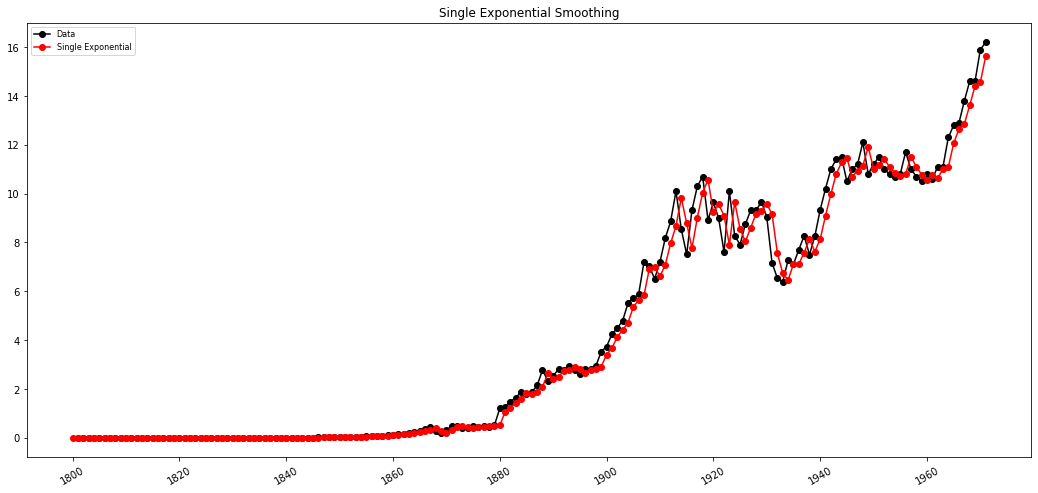

In [59]:
# Exponential Smoothing-Single:

data_SE = data_CO2[1:172]["CO2"]


fit1 = SimpleExpSmoothing(Train["CO2"]).fit(smoothing_level=0.8, optimized=False)


plt.figure(figsize=(18,8))


plt.plot(data_SE, marker="o", color="black", label='Data') 

plt.xticks(rotation=30)

plt.plot(fit1.fittedvalues, marker="o", color="red",label='Single Exponential')

plt.title('Single Exponential Smoothing')

plt.legend(loc='upper left', fontsize=8)





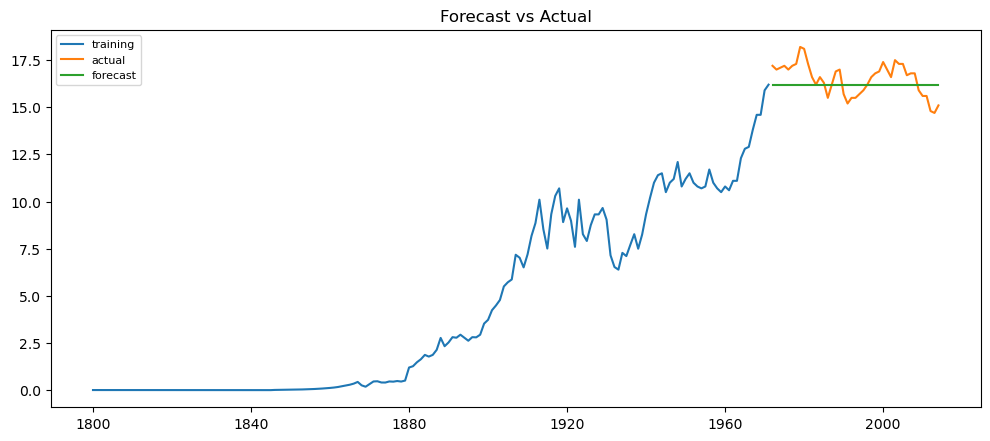

In [60]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(Train["CO2"], label='training')
plt.plot(Test["CO2"], label='actual')
plt.plot(pred_ses, label='forecast')
plt.title('Forecast vs Actual')
plt.legend(loc='upper left', fontsize=8)
plt.show()

#### Holt method

In [61]:
#Holt method
#MAPE value

hw_model = Holt(Train["CO2"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE_hw_model= MAPE_Value(pred_hw,Test.CO2) 
MAPE_hw_model

C:\Users\BHC228\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
<ipython-input-61-35c1c6ed5082>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  hw_model = Holt(Train["CO2"]).fit(smoothing_level=0.8, smoothing_slope=0.2)


0.7049642569325844

In [62]:
#Holt method
#RMSE Value 

hw_model = Holt(Train['CO2']).fit()
pred_hw = hw_model.predict(start = Test.index[0],end= Test.index[-1])
rmse_hw_model = RMSE_Value(pred_hw,Test.CO2)
rmse_hw_model

C:\Users\BHC228\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'


2.4513458646076556

C:\Users\BHC228\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'


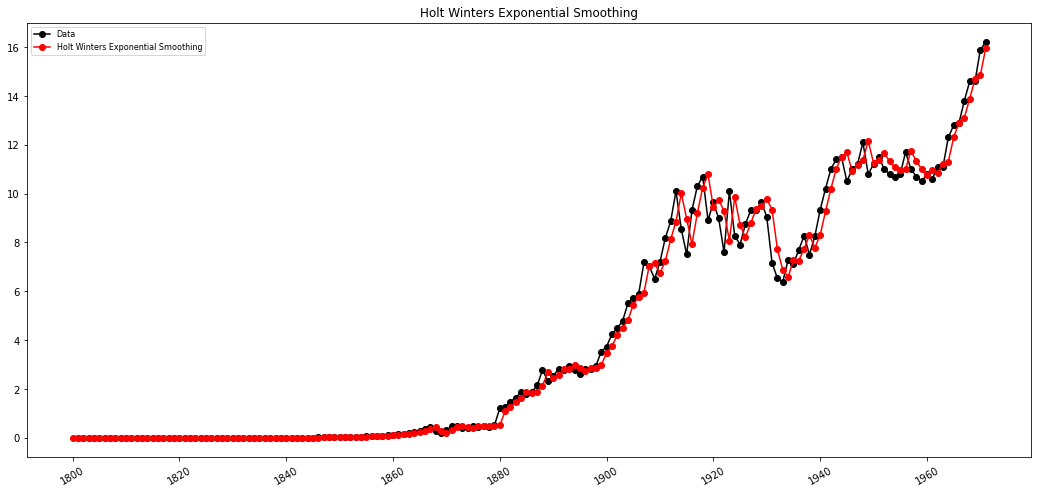

In [63]:
#Plot


fit2 = Holt(Train["CO2"], exponential=True).fit(smoothing_level=0.8)

plt.figure(figsize=(18,8))



plt.plot(data_SE, marker="o", color="black", label='Data') 

plt.xticks(rotation=30)



plt.plot(fit2.fittedvalues, marker="o", color="red",label = "Holt Winters Exponential Smoothing")

plt.title('Holt Winters Exponential Smoothing')

plt.legend(loc='upper left', fontsize=8)


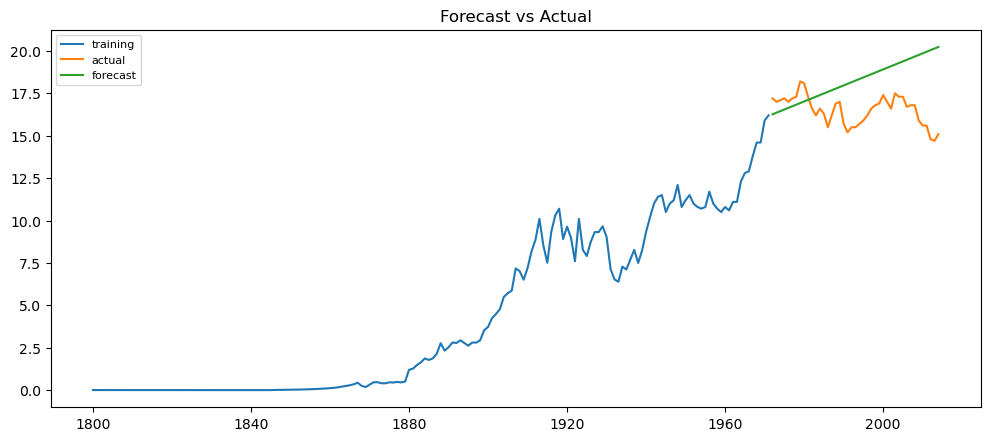

In [64]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(Train["CO2"], label='training')
plt.plot(Test["CO2"], label='actual')
plt.plot(pred_hw, label='forecast')
plt.title('Forecast vs Actual')
plt.legend(loc='upper left', fontsize=8)
plt.show()

#### Holts winter exponential smoothing with additive seasonality and additive trend

In [65]:
#Holts winter exponential smoothing with additive seasonality and additive trend
#MAPE value

hwe_model_add_add = ExponentialSmoothing(Train["CO2"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE_hwe_add_add_model=MAPE_Value(pred_hwe_add_add,Test.CO2)  
MAPE_hwe_add_add_model

C:\Users\BHC228\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'


0.12748809656235666

In [66]:
#Holts winter exponential smoothing with additive seasonality and additive trend
#RMSE value

hwe_model_add_add = ExponentialSmoothing(Train["CO2"],seasonal="add",trend="add",seasonal_periods=12).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
rmse_hwe_add_add_model = RMSE_Value(pred_hwe_add_add,Test.CO2)
rmse_hwe_add_add_model

C:\Users\BHC228\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'


2.4574110689199338

C:\Users\BHC228\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'


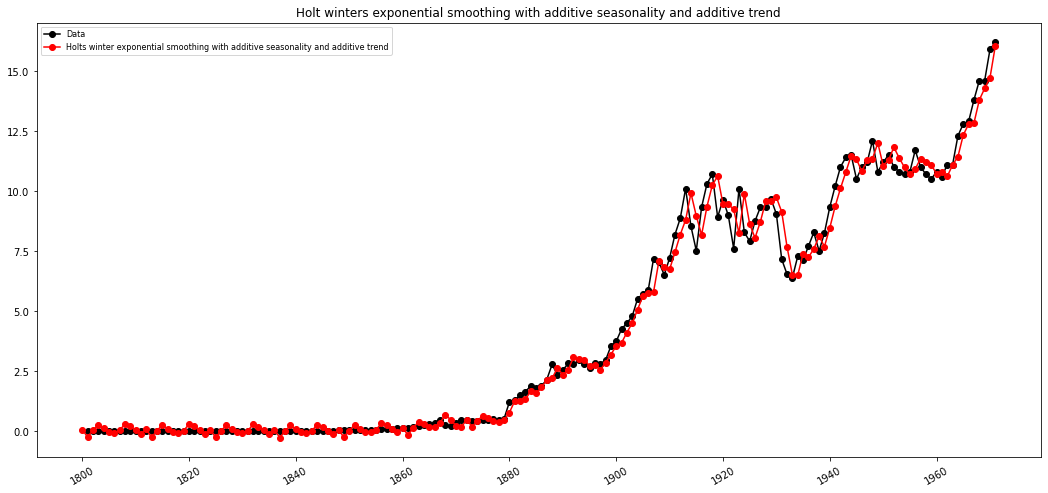

In [67]:
#Plot


fit3 = ExponentialSmoothing(Train["CO2"],seasonal="add",trend="add",seasonal_periods=12).fit(smoothing_level=0.8)

plt.figure(figsize=(18,8))

plt.plot(data_SE, marker="o", color="black",label="Data")

plt.xticks(rotation=30)


plt.plot(fit3.fittedvalues, marker="o", color="red",label="Holts winter exponential smoothing with additive seasonality and additive trend")

plt.title('Holt winters exponential smoothing with additive seasonality and additive trend')

plt.legend(loc='upper left', fontsize=8)

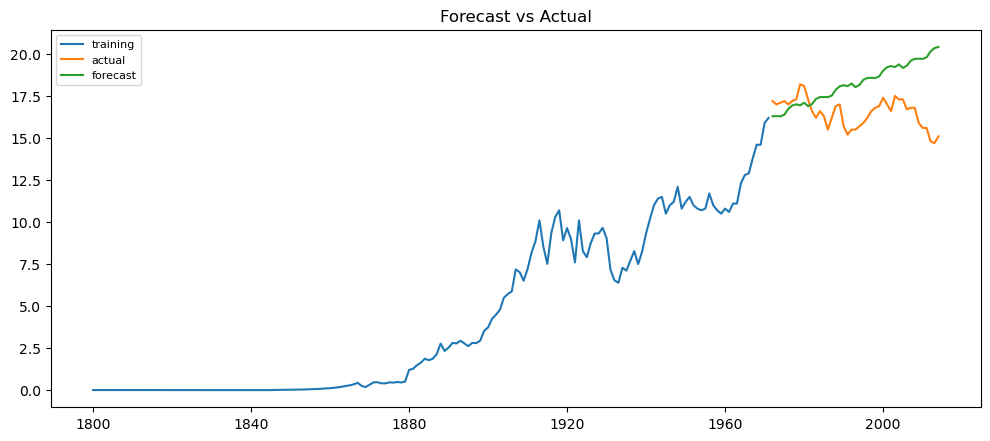

In [68]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(Train["CO2"], label='training')
plt.plot(Test["CO2"], label='actual')
plt.plot(pred_hwe_add_add, label='forecast')
plt.title('Forecast vs Actual')
plt.legend(loc='upper left', fontsize=8)
plt.show()

#### Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [69]:
#Holts winter exponential smoothing with multiplicative seasonality and additive trend
#MAPE value

hwe_model_mul_add = ExponentialSmoothing(Train["CO2"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE_hwe_model_mul_add_model=MAPE_Value(pred_hwe_mul_add,Test.CO2)  
MAPE_hwe_model_mul_add_model

C:\Users\BHC228\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\BHC228\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


0.6871978952786809

In [70]:
#Holts winter exponential smoothing with multiplicative seasonality and additive trend
#RMSE value

hwe_model_mul_add = ExponentialSmoothing(Train["CO2"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
rmse_hwe_model_mul_add_model = RMSE_Value(pred_hwe_mul_add,Test.CO2)
rmse_hwe_model_mul_add_model

C:\Users\BHC228\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\BHC228\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


12.97708037255137

C:\Users\BHC228\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\BHC228\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


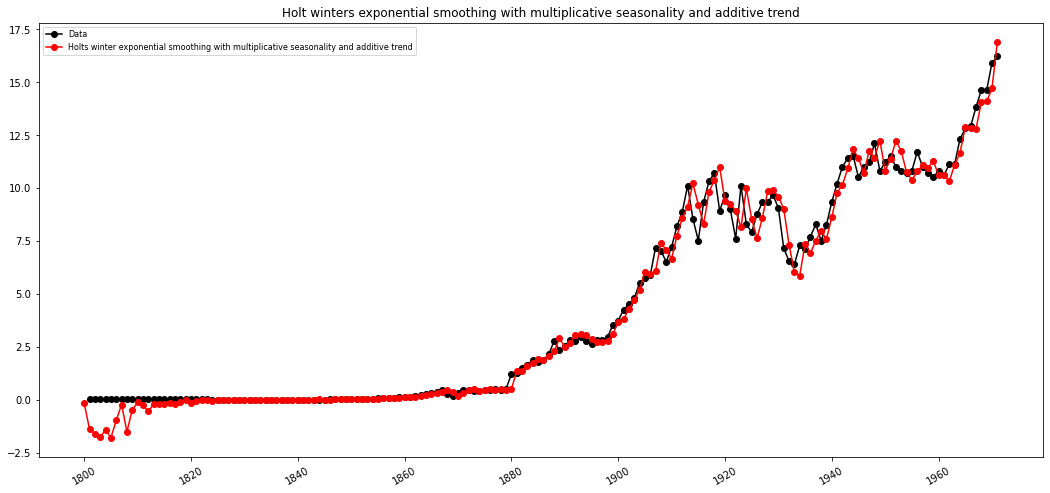

In [71]:
#Plot

fit4 = ExponentialSmoothing(Train["CO2"], seasonal="mul",trend="add",seasonal_periods=12).fit(smoothing_level=0.8)

plt.figure(figsize=(18,8))

plt.plot(data_SE, marker="o", color="black",label="Data")

plt.xticks(rotation=30)


plt.plot(fit4.fittedvalues, marker="o", color="red",label="Holts winter exponential smoothing with multiplicative seasonality and additive trend")

plt.title('Holt winters exponential smoothing with multiplicative seasonality and additive trend')

plt.legend(loc='upper left', fontsize=8)

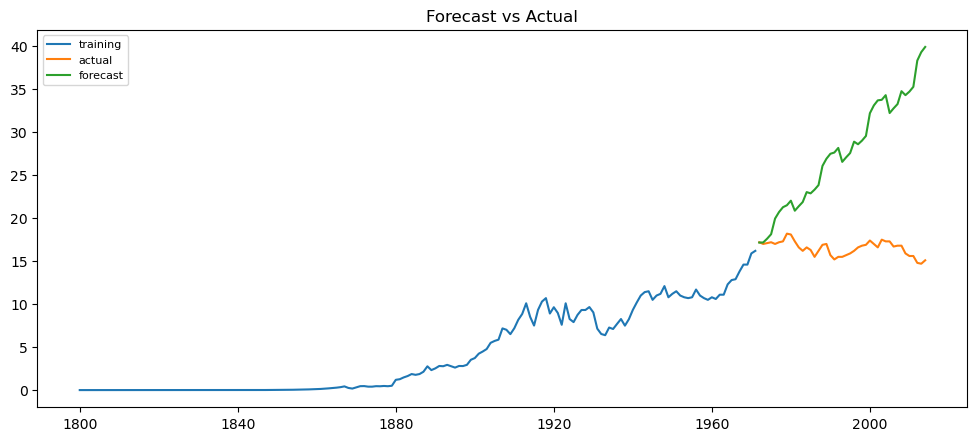

In [72]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(Train["CO2"], label='training')
plt.plot(Test["CO2"], label='actual')
plt.plot(pred_hwe_mul_add, label='forecast')
plt.title('Forecast vs Actual')
plt.legend(loc='upper left', fontsize=8)
plt.show()

#### Holts winter exponential smoothing with multiplicative seasonality and multiplicative trend

In [73]:
#Holts winter exponential smoothing with multiplicative seasonality and multiplicative trend
#MAPE value

hwe_model_mul_mul = ExponentialSmoothing(Train["CO2"],seasonal="mul",trend="mul",seasonal_periods=12).fit() 
pred_hwe_mul_mul = hwe_model_mul_mul.predict(start = Test.index[0],end = Test.index[-1])
MAPE_hwe_model_mul_mul_model=MAPE_Value(pred_hwe_mul_mul,Test.CO2) 
MAPE_hwe_model_mul_mul_model

C:\Users\BHC228\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\BHC228\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


0.43478819750280184

In [74]:
#Holts winter exponential smoothing with multiplicative seasonality and multiplicative trend
#RMSE value

hwe_model_mul_mul = ExponentialSmoothing(Train["CO2"],seasonal="mul",trend="mul",seasonal_periods=12).fit() 
pred_hwe_mul_mul = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
rmse_hwe_model_mul_mul_model = RMSE_Value(pred_hwe_mul_mul,Test.CO2)
rmse_hwe_model_mul_mul_model

C:\Users\BHC228\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'


12.97708037255137

C:\Users\BHC228\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\BHC228\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


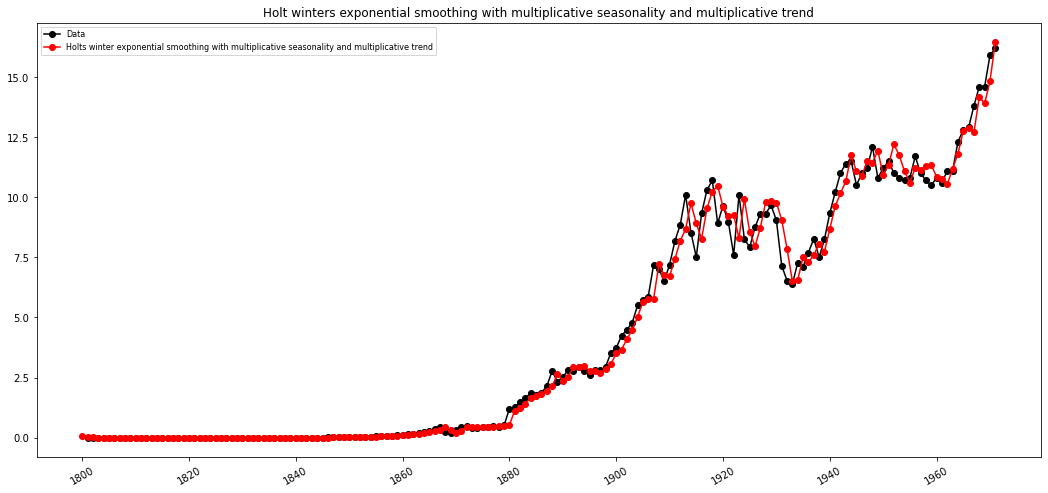

In [75]:
#Plot

fit5 = ExponentialSmoothing(Train["CO2"], seasonal="mul",trend="mul",seasonal_periods=12).fit(smoothing_level=0.8)

plt.figure(figsize=(18,8))

plt.plot(data_SE, marker="o",  color="black",label="Data")

plt.xticks(rotation=30)


plt.plot(fit5.fittedvalues, marker="o", color="red",label="Holts winter exponential smoothing with multiplicative seasonality and multiplicative trend")

plt.title('Holt winters exponential smoothing with multiplicative seasonality and multiplicative trend')

plt.legend(loc='upper left', fontsize=8)

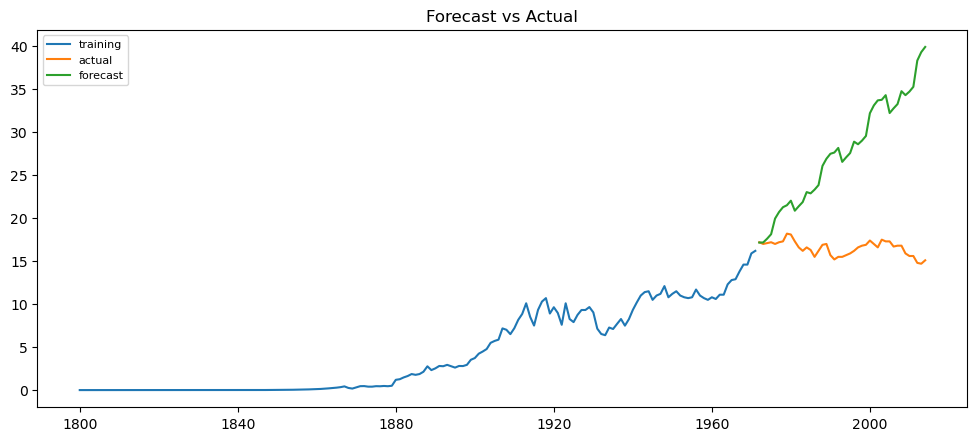

In [76]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(Train["CO2"], label='training')
plt.plot(Test["CO2"], label='actual')
plt.plot(pred_hwe_mul_mul, label='forecast')
plt.title('Forecast vs Actual')
plt.legend(loc='upper left', fontsize=8)
plt.show()

#### Linear , Exponential and Quadratic Models of forecasting: 

In [77]:
# Data preprocessing for models
data_model = data_CO2.copy()
data_model.head()

,CO2,sqrt_CO2,Log_CO2,recp_CO2,exp_CO2
Year,,,,,
1800-01-01,0.00568,0.075366,-5.170804,176.056338,1.005696
1801-01-01,0.00561,0.074900,-5.183205,178.253119,1.005626
1802-01-01,0.00555,0.074498,-5.193957,180.180180,1.005565
1803-01-01,0.00548,0.074027,-5.206650,182.481752,1.005495
1804-01-01,0.00542,0.073621,-5.217659,184.501845,1.005435


In [78]:
data_model["t"] = np.arange(1,216)
data_model["t_squared"]=data_model["t"]*data_model["t"]
data_model["lg_CO2"]= np.log(data_model["CO2"])
data_model.head()

,CO2,sqrt_CO2,Log_CO2,recp_CO2,exp_CO2,t,t_squared,lg_CO2
Year,,,,,,,,
1800-01-01,0.00568,0.075366,-5.170804,176.056338,1.005696,1,1,-5.170804
1801-01-01,0.00561,0.074900,-5.183205,178.253119,1.005626,2,4,-5.183205
1802-01-01,0.00555,0.074498,-5.193957,180.180180,1.005565,3,9,-5.193957
1803-01-01,0.00548,0.074027,-5.206650,182.481752,1.005495,4,16,-5.206650
1804-01-01,0.00542,0.073621,-5.217659,184.501845,1.005435,5,25,-5.217659


In [79]:
#Splitting data into Train and Test
Train_m = data_model.head(172)
Test_m = data_model.tail(43)

In [80]:
Train_m.head()

,CO2,sqrt_CO2,Log_CO2,recp_CO2,exp_CO2,t,t_squared,lg_CO2
Year,,,,,,,,
1800-01-01,0.00568,0.075366,-5.170804,176.056338,1.005696,1,1,-5.170804
1801-01-01,0.00561,0.074900,-5.183205,178.253119,1.005626,2,4,-5.183205
1802-01-01,0.00555,0.074498,-5.193957,180.180180,1.005565,3,9,-5.193957
1803-01-01,0.00548,0.074027,-5.206650,182.481752,1.005495,4,16,-5.206650
1804-01-01,0.00542,0.073621,-5.217659,184.501845,1.005435,5,25,-5.217659


In [81]:
Test_m.head()

,CO2,sqrt_CO2,Log_CO2,recp_CO2,exp_CO2,t,t_squared,lg_CO2
Year,,,,,,,,
1972-01-01,17.2,4.147288,2.844909,0.058140,2.950293e+07,173,29929,2.844909
1973-01-01,17.0,4.123106,2.833213,0.058824,2.415495e+07,174,30276,2.833213
1974-01-01,17.1,4.135215,2.839078,0.058480,2.669535e+07,175,30625,2.839078
1975-01-01,17.2,4.147288,2.844909,0.058140,2.950293e+07,176,30976,2.844909
1976-01-01,17.0,4.123106,2.833213,0.058824,2.415495e+07,177,31329,2.833213


#### Linear Model

In [82]:
linear_model = smf.ols('CO2~t',data=Train_m).fit()
pred_linear = pd.Series(linear_model.predict(pd.DataFrame(Test_m['t'])))
#RMSE value
rmse_linear_model = RMSE_Value(pred_linear,Test_m['CO2'])
rmse_linear_model

3.1445157061117652

In [83]:
#MAPE value
MAPE_linear_model = MAPE_Value(pred_linear,Test_m['CO2'])
MAPE_linear_model

0.16483919760009139

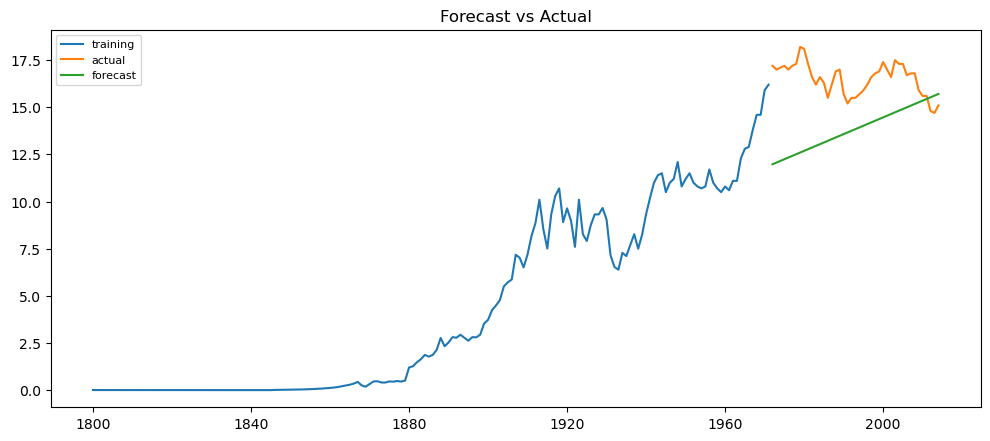

In [84]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(Train_m["CO2"], label='training')
plt.plot(Test_m["CO2"], label='actual')
plt.plot(pred_linear, label='forecast')
plt.title('Forecast vs Actual')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [85]:
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CO2   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     944.6
Date:                Mon, 20 Dec 2021   Prob (F-statistic):           2.54e-71
Time:                        19:50:24   Log-Likelihood:                -351.72
No. Observations:                 172   AIC:                             707.4
Df Residuals:                     170   BIC:                             713.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3801      0.288    -11.732      0.000      -3.949      -2.811
t              0.0888      0.003     30.734      0.000       0.083       0.094
==============================================================================
Omnibus:                       38.221   Durbin-Watson:                   0.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.438
Skew:                           0.105   Prob(JB):                       0.0147
Kurtosis:                       1.936   Cond. No.                         200.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Exponential Model

In [86]:
Exp = smf.ols('lg_CO2~t',data=Train_m).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test_m['t'])))

#RMSE value
rmse_Exp_model = RMSE_Value(np.exp(pred_Exp),Test_m['CO2'])
rmse_Exp_model

550.3307096054041

In [87]:
#MAPE Value
MAPE_Exp_model = MAPE_Value(np.exp(pred_Exp),Test_m['CO2'])
MAPE_Exp_model

27.070958538117438

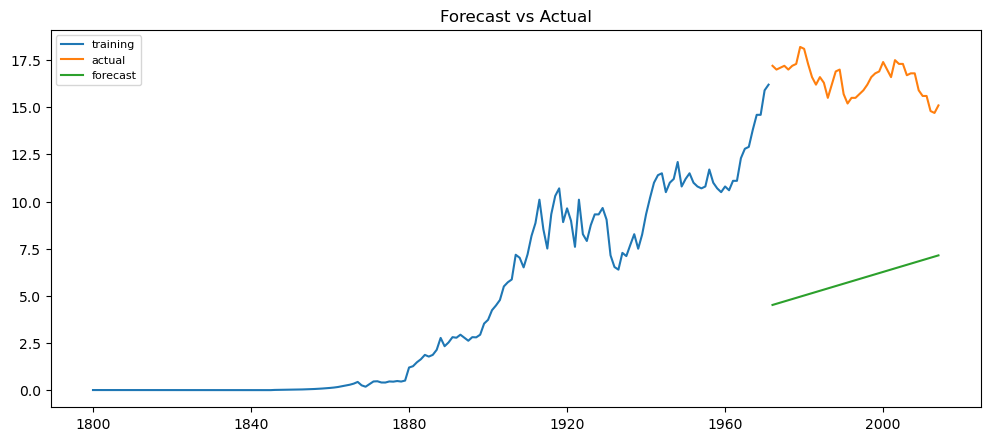

In [88]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(Train_m["CO2"], label='training')
plt.plot(Test_m["CO2"], label='actual')
plt.plot(pred_Exp, label='forecast')
plt.title('Forecast vs Actual')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [89]:
Exp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 lg_CO2   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     1198.
Date:                Mon, 20 Dec 2021   Prob (F-statistic):           6.73e-79
Time:                        19:50:24   Log-Likelihood:                -271.13
No. Observations:                 172   AIC:                             546.3
Df Residuals:                     170   BIC:                             552.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.3091      0.180    -34.988      0.000      -6.665      -5.953
t              0.0626      0.002     34.616      0.000       0.059       0.066
==============================================================================
Omnibus:                       14.863   Durbin-Watson:                   0.028
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               10.019
Skew:                          -0.460   Prob(JB):                      0.00668
Kurtosis:                       2.257   Cond. No.                         200.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Quadratic Model

In [90]:
Quad = smf.ols('CO2~t+t_squared',data=Train_m).fit()
pred_Quad = pd.Series(Quad.predict(Test_m[["t","t_squared"]]))

#RMSE VALUE
rmse_Quad_model = RMSE_Value(pred_Quad,Test_m['CO2'])
rmse_Quad_model

4.495138217852184

In [91]:
#MAPE Value
MAPE_Quad_model = MAPE_Value(pred_Quad,Test_m['CO2'])
MAPE_Quad_model

0.23150157996232745

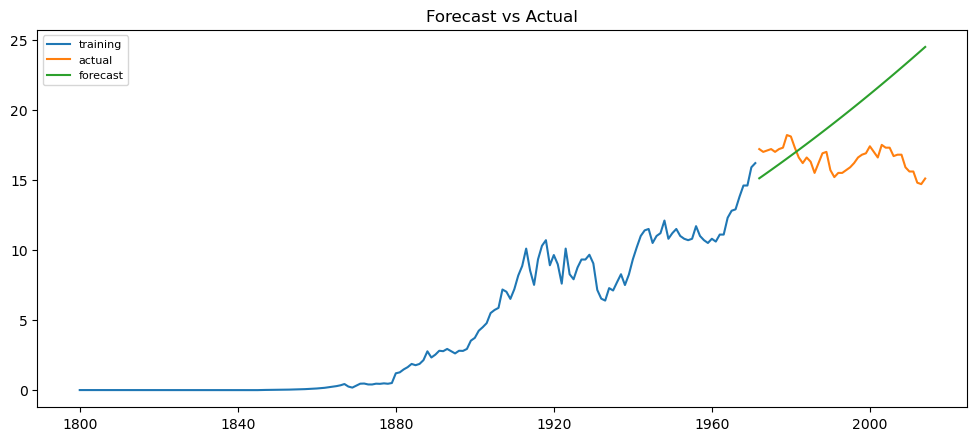

In [92]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(Train_m["CO2"], label='training')
plt.plot(Test_m["CO2"], label='actual')
plt.plot(pred_Quad, label='forecast')
plt.title('Forecast vs Actual')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [93]:
Quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CO2   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     1128.
Date:                Mon, 20 Dec 2021   Prob (F-statistic):           1.78e-98
Time:                        19:50:25   Log-Likelihood:                -284.37
No. Observations:                 172   AIC:                             574.7
Df Residuals:                     169   BIC:                             584.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2444      0.295     -0.828      0.409      -0.827       0.338
t             -0.0193      0.008     -2.456      0.015      -0.035      -0.004
t_squared      0.0006   4.41e-05     14.172      0.000       0.001       0.001
==============================================================================
Omnibus:                       33.246   Durbin-Watson:                   0.188
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.854
Skew:                           1.048   Prob(JB):                     1.49e-11
Kurtosis:                       4.601   Cond. No.                     4.05e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### ARIMA MODEL NON STATIONARY DATA

In [94]:
df.head()

,CO2
Year,
1800-01-01,0.00568
1801-01-01,0.00561
1802-01-01,0.00555
1803-01-01,0.00548
1804-01-01,0.00542


In [95]:
#splitting the data

train_a = df[:-43]
test_a = df[-43:]

In [96]:
train_a.head()

,CO2
Year,
1800-01-01,0.00568
1801-01-01,0.00561
1802-01-01,0.00555
1803-01-01,0.00548
1804-01-01,0.00542


In [97]:
test_a.head()

,CO2
Year,
1972-01-01,17.2
1973-01-01,17.0
1974-01-01,17.1
1975-01-01,17.2
1976-01-01,17.0


In [98]:
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(train, test, arima_order):
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

In [99]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(train, test, p_values, d_values, q_values):
    #dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, test, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [100]:
# evaluate parameters
p_values = range(0, 5)
d_values = range(0, 5)
q_values = range(0, 5)
warnings.filterwarnings("ignore")
evaluate_models(train_a.values, test_a.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=10.984
ARIMA(0, 0, 1) RMSE=5.779
ARIMA(0, 0, 2) RMSE=3.484
ARIMA(0, 0, 3) RMSE=2.236
ARIMA(0, 0, 4) RMSE=1.841
ARIMA(0, 1, 0) RMSE=0.507
ARIMA(0, 1, 1) RMSE=0.511
ARIMA(0, 1, 2) RMSE=0.507
ARIMA(0, 1, 3) RMSE=0.511
ARIMA(0, 1, 4) RMSE=0.513
ARIMA(0, 2, 0) RMSE=0.671
ARIMA(0, 2, 1) RMSE=0.525
ARIMA(0, 2, 2) RMSE=0.536
ARIMA(0, 2, 3) RMSE=0.537
ARIMA(0, 2, 4) RMSE=0.535
ARIMA(0, 3, 0) RMSE=1.100
ARIMA(0, 3, 1) RMSE=0.673
ARIMA(0, 3, 2) RMSE=0.538
ARIMA(0, 3, 3) RMSE=0.549
ARIMA(0, 3, 4) RMSE=0.568
ARIMA(0, 4, 0) RMSE=1.989
ARIMA(0, 4, 1) RMSE=1.103
ARIMA(0, 4, 2) RMSE=0.706
ARIMA(0, 4, 3) RMSE=0.536
ARIMA(0, 4, 4) RMSE=0.539
ARIMA(1, 0, 0) RMSE=0.506
ARIMA(1, 0, 1) RMSE=0.510
ARIMA(1, 0, 2) RMSE=0.507
ARIMA(1, 0, 3) RMSE=0.510
ARIMA(1, 0, 4) RMSE=0.512
ARIMA(1, 1, 0) RMSE=0.510
ARIMA(1, 1, 1) RMSE=0.503
ARIMA(1, 1, 2) RMSE=0.508
ARIMA(1, 1, 3) RMSE=0.513
ARIMA(1, 1, 4) RMSE=0.514
ARIMA(1, 2, 0) RMSE=0.646
ARIMA(1, 2, 1) RMSE=0.534
ARIMA(1, 2, 2) RMSE=0.520
ARIMA(1, 2,

In [101]:
#order(3,1,4)

model_arima_a = ARIMA(train_a['CO2'],order = (3,1,4))
model_arima_a = model_arima_a.fit()
model_arima_a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    CO2   No. Observations:                  172
Model:                 ARIMA(3, 1, 4)   Log Likelihood                -138.277
Date:                Mon, 20 Dec 2021   AIC                            292.555
Time:                        20:04:45   BIC                            317.688
Sample:                    01-01-1800   HQIC                           302.753
                         - 01-01-1971                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8374      0.378      2.213      0.027       0.096       1.579
ar.L2          0.1333      0.474      0.281      0.778      -0.795       1.062
ar.L3         -0.4673      0.235     -1.985      0.047      -0.929      -0.006
ma.L1         -0.9088      0.390     -2.331      0.020      -1.673      -0.145
ma.L2         -0.2044      0.485     -0.421      0.674      -1.156       0.747
ma.L3          0.7179      0.200      3.594      0.000       0.326       1.109
ma.L4         -0.0632      0.115     -0.549      0.583      -0.289       0.162
sigma2         0.2939      0.023     12.656      0.000       0.248       0.339
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):                87.87
Prob(Q):                              0.69   Prob(JB):                         0.00
Heteroskedasticity (H):           76883.80   Skew:                            -0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [102]:
### prediction on test set
start = len(train_a)
end = len(train_a)+len(test_a)-1
pred_arima_a = model_arima_a.predict(start=start,end=end)
print(pred_arima_a)

1972-01-01    16.180619
1973-01-01    16.411167
1974-01-01    16.466098
1975-01-01    16.545042
1976-01-01    16.510735
1977-01-01    16.466863
1978-01-01    16.388660
1979-01-01    16.333357
1980-01-01    16.297121
1981-01-01    16.295950
1982-01-01    16.315982
1983-01-01    16.349533
1984-01-01    16.380846
1985-01-01    16.402179
1986-01-01    16.408540
1987-01-01    16.402078
1988-01-01    16.387545
1989-01-01    16.371542
1990-01-01    16.359223
1991-01-01    16.353565
1992-01-01    16.354663
1993-01-01    16.360585
1994-01-01    16.368334
1995-01-01    16.375100
1996-01-01    16.379031
1997-01-01    16.379604
1998-01-01    16.377446
1999-01-01    16.373878
2000-01-01    16.370335
2001-01-01    16.367901
2002-01-01    16.367058
2003-01-01    16.367683
2004-01-01    16.369231
2005-01-01    16.371005
2006-01-01    16.372405
2007-01-01    16.373090
2008-01-01    16.373021
2009-01-01    16.372401
2010-01-01    16.371553
2011-01-01    16.370791
2012-01-01    16.370330
2013-01-01    16

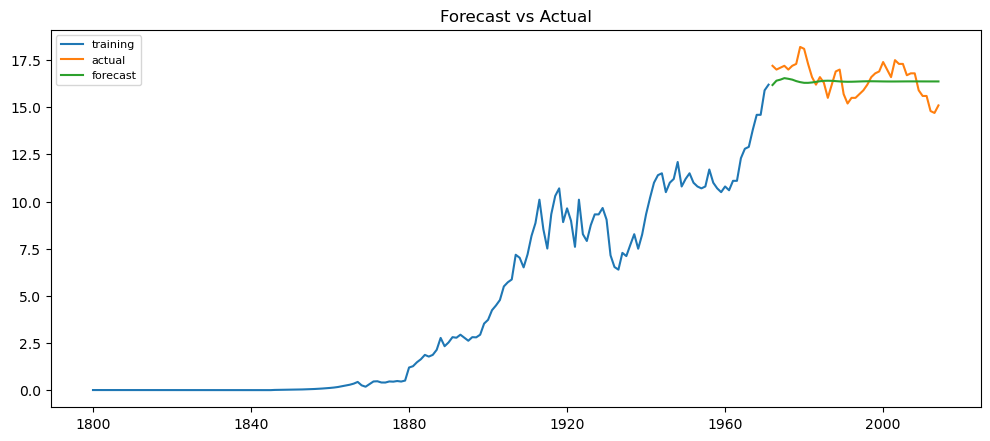

In [103]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_a["CO2"], label='training')
plt.plot(test_a["CO2"], label='actual')
plt.plot(pred_arima_a, label='forecast')

plt.title('Forecast vs Actual')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [104]:
#RMSE Value
RMSE_ARIMA_a = RMSE_Value(pred_arima_a.values, test_a.values)
RMSE_ARIMA_a

0.8483279004831579

In [105]:
#MAPE Value
MAPE_ARIMA_a = MAPE_Value(pred_arima_a.values, test_a.values)
MAPE_ARIMA_a

0.04445367386727154

### Stationary Data:

#### Model - ARIMA(Stationary Data) :

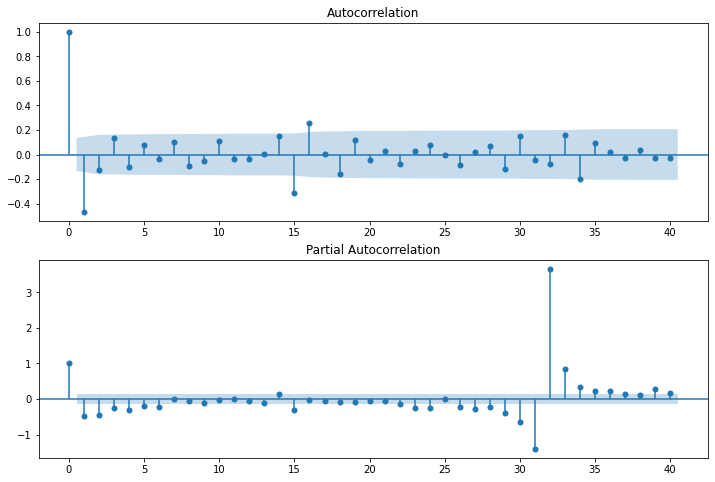

In [106]:
#ACF and PACF plots:
#Stationary Data

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data_CO2_seasonal_first_difference.dropna(inplace=False), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data_CO2_seasonal_first_difference.dropna(inplace=False), lags=40, ax=ax2)

In [107]:
#dataframe seasonal first difference

data_CO2_seasonal_first_difference.head()

,CO2
Year,
1800-01-01,NaN
1801-01-01,NaN
1802-01-01,0.00001
1803-01-01,-0.00001
1804-01-01,0.00001


In [108]:
X= data_CO2_seasonal_first_difference.dropna(inplace=False)

In [109]:
X.head()

,CO2
Year,
1802-01-01,1.000000e-05
1803-01-01,-1.000000e-05
1804-01-01,1.000000e-05
1805-01-01,-8.673617e-19
1806-01-01,-1.000000e-05


In [110]:
# Create Training and Test
train = X.iloc[:-43]
test = X.iloc[-43:]

In [111]:
print(train.shape,test.shape)

(170, 1) (43, 1)


In [112]:
train.head()

,CO2
Year,
1802-01-01,1.000000e-05
1803-01-01,-1.000000e-05
1804-01-01,1.000000e-05
1805-01-01,-8.673617e-19
1806-01-01,-1.000000e-05


In [113]:
test.head()

,CO2
Year,
1972-01-01,7.000000e-01
1973-01-01,-1.200000e+00
1974-01-01,3.000000e-01
1975-01-01,-3.552714e-15
1976-01-01,-3.000000e-01


In [114]:
# evaluate parameters

p_values = range(0, 5)
d_values = range(0, 5)
q_values = range(0, 5)
warnings.filterwarnings("ignore")
evaluate_models(train.values, test.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=0.673
ARIMA(0, 0, 1) RMSE=0.545
ARIMA(0, 0, 2) RMSE=0.558
ARIMA(0, 0, 3) RMSE=0.559
ARIMA(0, 0, 4) RMSE=0.557
ARIMA(0, 1, 0) RMSE=1.100
ARIMA(0, 1, 1) RMSE=0.673
ARIMA(0, 1, 2) RMSE=0.538
ARIMA(0, 1, 3) RMSE=0.549
ARIMA(0, 1, 4) RMSE=0.567
ARIMA(0, 2, 0) RMSE=1.989
ARIMA(0, 2, 1) RMSE=1.103
ARIMA(0, 2, 2) RMSE=0.706
ARIMA(0, 2, 3) RMSE=0.535
ARIMA(0, 2, 4) RMSE=0.554
ARIMA(0, 3, 0) RMSE=3.758
ARIMA(0, 3, 1) RMSE=1.994
ARIMA(0, 3, 2) RMSE=1.110
ARIMA(0, 3, 3) RMSE=0.710
ARIMA(0, 3, 4) RMSE=0.619
ARIMA(0, 4, 0) RMSE=7.198
ARIMA(0, 4, 1) RMSE=3.768
ARIMA(0, 4, 2) RMSE=2.005
ARIMA(0, 4, 3) RMSE=1.119
ARIMA(0, 4, 4) RMSE=0.738
ARIMA(1, 0, 0) RMSE=0.648
ARIMA(1, 0, 1) RMSE=0.555
ARIMA(1, 0, 2) RMSE=0.544
ARIMA(1, 0, 3) RMSE=0.554
ARIMA(1, 0, 4) RMSE=0.556
ARIMA(1, 1, 0) RMSE=0.923
ARIMA(1, 1, 1) RMSE=0.648
ARIMA(1, 1, 2) RMSE=0.547
ARIMA(1, 1, 3) RMSE=0.541
ARIMA(1, 1, 4) RMSE=0.560
ARIMA(1, 2, 0) RMSE=1.417
ARIMA(1, 2, 1) RMSE=0.925
ARIMA(1, 2, 2) RMSE=0.733
ARIMA(1, 2, 

#### ARIMA model

In [115]:
#order(1,2,4)
model_arima = ARIMA(train['CO2'],order = (1,2,4))
model_arima = model_arima.fit()
model_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    CO2   No. Observations:                  170
Model:                 ARIMA(1, 2, 4)   Log Likelihood                -157.770
Date:                Mon, 20 Dec 2021   AIC                            327.540
Time:                        20:21:27   BIC                            346.283
Sample:                    01-01-1802   HQIC                           335.147
                         - 01-01-1971                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9998     19.279     -0.052      0.959     -38.785      36.786
ma.L1         -1.9752     23.105     -0.085      0.932     -47.260      43.309
ma.L2         -0.0238     68.343     -0.000      1.000    -133.974     133.926
ma.L3          1.9747     67.909      0.029      0.977    -131.125     135.074
ma.L4         -0.9757     22.662     -0.043      0.966     -45.393      43.442
sigma2         0.3147      1.513      0.208      0.835      -2.651       3.281
===================================================================================
Ljung-Box (L1) (Q):                   1.50   Jarque-Bera (JB):               207.75
Prob(Q):                              0.22   Prob(JB):                         0.00
Heteroskedasticity (H):          233105.95   Skew:                            -0.86
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [116]:
### prediction on test set
start = len(train)
end = len(train)+len(test)-1
pred_arima = model_arima.predict(start=start,end=end)
print(pred_arima)

1972-01-01   -0.074215
1973-01-01    0.003094
1974-01-01    0.001100
1975-01-01    0.003105
1976-01-01    0.001112
1977-01-01    0.003117
1978-01-01    0.001125
1979-01-01    0.003129
1980-01-01    0.001138
1981-01-01    0.003141
1982-01-01    0.001150
1983-01-01    0.003152
1984-01-01    0.001163
1985-01-01    0.003164
1986-01-01    0.001176
1987-01-01    0.003176
1988-01-01    0.001188
1989-01-01    0.003188
1990-01-01    0.001201
1991-01-01    0.003199
1992-01-01    0.001213
1993-01-01    0.003211
1994-01-01    0.001226
1995-01-01    0.003223
1996-01-01    0.001239
1997-01-01    0.003235
1998-01-01    0.001251
1999-01-01    0.003246
2000-01-01    0.001264
2001-01-01    0.003258
2002-01-01    0.001276
2003-01-01    0.003270
2004-01-01    0.001289
2005-01-01    0.003282
2006-01-01    0.001302
2007-01-01    0.003293
2008-01-01    0.001314
2009-01-01    0.003305
2010-01-01    0.001327
2011-01-01    0.003317
2012-01-01    0.001339
2013-01-01    0.003329
2014-01-01    0.001352
Freq: AS-JA

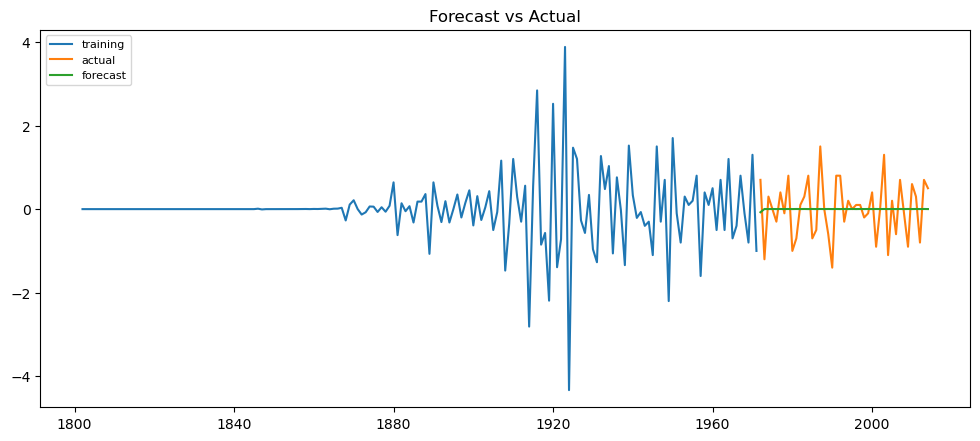

In [117]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train["CO2"], label='training')
plt.plot(test["CO2"], label='actual')
plt.plot(pred_arima, label='forecast')
plt.title('Forecast vs Actual')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [118]:
#RMSE value
RMSE_ARIMA = RMSE_Value(pred_arima.values,test.values)
RMSE_ARIMA

0.6709186330212935

In [119]:
#MAPE Value
MAPE_ARIMA = MAPE_Value(pred_arima.values, test.values)
MAPE_ARIMA

inf

#### Auto Regressor (AR) model

In [120]:
model_ar = AutoReg(train,lags = 6).fit()
print(model_ar.summary())

                            AutoReg Model Results                             
Dep. Variable:                    CO2   No. Observations:                  170
Model:                     AutoReg(6)   Log Likelihood                -136.827
Method:               Conditional MLE   S.D. of innovations              0.557
Date:                Mon, 20 Dec 2021   AIC                             -1.072
Time:                        20:21:28   BIC                             -0.920
Sample:                    01-01-1808   HQIC                            -1.010
                         - 01-01-1971                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0196      0.044      0.450      0.653      -0.066       0.105
CO2.L1        -1.0307      0.075    -13.674      0.000      -1.178      -0.883
CO2.L2        -1.0651      0.103    -10.377      0.0

In [121]:
### prediction on test set
pred_ar = model_ar.predict(start=start,end=end,dynamic = False)
print(pred_ar)

1972-01-01    0.114778
1973-01-01    0.323064
1974-01-01   -0.155579
1975-01-01    0.054239
1976-01-01   -0.059303
1977-01-01    0.108803
1978-01-01   -0.153236
1979-01-01    0.065136
1980-01-01    0.082311
1981-01-01   -0.072513
1982-01-01    0.029973
1983-01-01   -0.004145
1984-01-01   -0.003914
1985-01-01   -0.001108
1986-01-01    0.020970
1987-01-01    0.009367
1988-01-01   -0.014197
1989-01-01    0.010373
1990-01-01    0.001232
1991-01-01    0.001386
1992-01-01    0.008640
1993-01-01    0.004964
1994-01-01    0.001480
1995-01-01    0.000918
1996-01-01    0.005016
1997-01-01    0.003409
1998-01-01    0.003899
1999-01-01    0.004848
2000-01-01    0.002731
2001-01-01    0.002750
2002-01-01    0.003542
2003-01-01    0.003940
2004-01-01    0.003701
2005-01-01    0.003687
2006-01-01    0.003550
2007-01-01    0.003179
2008-01-01    0.003487
2009-01-01    0.003711
2010-01-01    0.003647
2011-01-01    0.003577
2012-01-01    0.003516
2013-01-01    0.003471
2014-01-01    0.003494
Freq: AS-JA

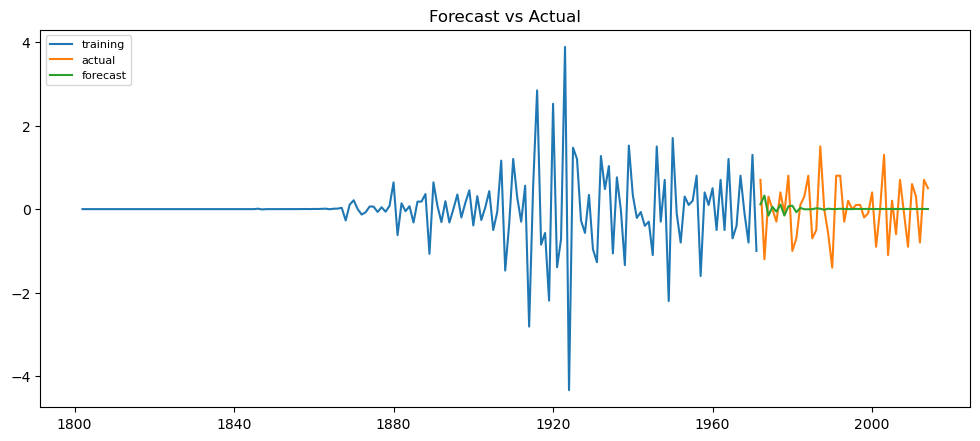

In [122]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train["CO2"], label='training')
plt.plot(test["CO2"], label='actual')
plt.plot(pred_ar, label='forecast')
plt.title('Forecast vs Actual')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [123]:
#RMSE Value
RMSE_AR = RMSE_Value(pred_ar.values,test.values)
RMSE_AR

0.6742760980687206

In [124]:
#MAPE Value
MAPE_AR = MAPE_Value(pred_ar.values, test.values)
MAPE_AR

inf

#### Moving Average (MA) model

In [125]:
#order(0,1,3)
model_ma = ARIMA(train['CO2'],order = (0,1,3))
model_ma = model_ma.fit()
model_ma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    CO2   No. Observations:                  170
Model:                 ARIMA(0, 1, 3)   Log Likelihood                -147.611
Date:                Mon, 20 Dec 2021   AIC                            303.222
Time:                        20:21:28   BIC                            315.742
Sample:                    01-01-1802   HQIC                           308.303
                         - 01-01-1971                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -2.1044      1.366     -1.541      0.123      -4.781       0.572
ma.L2          1.2104      1.523      0.795      0.427      -1.774       4.195
ma.L3         -0.1057      0.163     -0.647      0.517      -0.426       0.214
sigma2         0.3036      0.417      0.728      0.466      -0.513       1.121
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               148.60
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):          100707.61   Skew:                            -0.80
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [126]:
### prediction on test set
pred_ma = model_ma.predict(start=start,end=end)
print(pred_ma)

1972-01-01   -0.105629
1973-01-01    0.022739
1974-01-01    0.001608
1975-01-01    0.001608
1976-01-01    0.001608
1977-01-01    0.001608
1978-01-01    0.001608
1979-01-01    0.001608
1980-01-01    0.001608
1981-01-01    0.001608
1982-01-01    0.001608
1983-01-01    0.001608
1984-01-01    0.001608
1985-01-01    0.001608
1986-01-01    0.001608
1987-01-01    0.001608
1988-01-01    0.001608
1989-01-01    0.001608
1990-01-01    0.001608
1991-01-01    0.001608
1992-01-01    0.001608
1993-01-01    0.001608
1994-01-01    0.001608
1995-01-01    0.001608
1996-01-01    0.001608
1997-01-01    0.001608
1998-01-01    0.001608
1999-01-01    0.001608
2000-01-01    0.001608
2001-01-01    0.001608
2002-01-01    0.001608
2003-01-01    0.001608
2004-01-01    0.001608
2005-01-01    0.001608
2006-01-01    0.001608
2007-01-01    0.001608
2008-01-01    0.001608
2009-01-01    0.001608
2010-01-01    0.001608
2011-01-01    0.001608
2012-01-01    0.001608
2013-01-01    0.001608
2014-01-01    0.001608
Freq: AS-JA

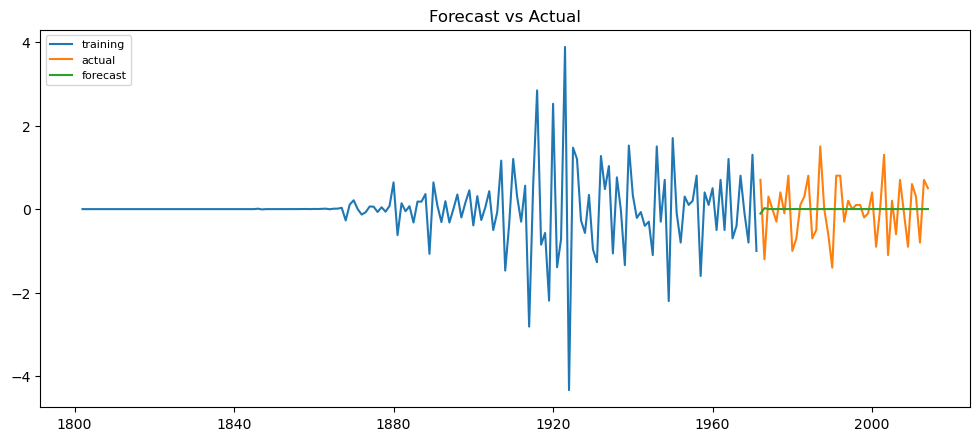

In [127]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train["CO2"], label='training')
plt.plot(test["CO2"], label='actual')
plt.plot(pred_ma, label='forecast')
plt.title('Forecast vs Actual')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [128]:
#RMSE Value
RMSE_MA = RMSE_Value(pred_ma.values,test.values)
RMSE_MA

0.6710259323134569

In [129]:
#MAPE Value
MAPE_MA = MAPE_Value(pred_ma.values, test.values)
MAPE_MA

inf

### Comparison of Models :

In [130]:
#Compare the results 

compare_model = {"MODEL":pd.Series(["Single Exponential","Holts Winter","Holts winter exp add sea and add trend","Holts winter exp mul sea and add trend","Holts winter exp mul sea and mul trend","Linear Model","Exponential Model","Quadratic Model","ARIMA Model(stationary)","Auto Regressor","Moving Average","ARIMA(3,1,4)"]),
                 "RMSE_Values" :pd.Series([rmse_ses_model,rmse_hw_model,rmse_hwe_add_add_model,rmse_hwe_model_mul_add_model,rmse_hwe_model_mul_add_model,rmse_linear_model,rmse_Exp_model,rmse_Quad_model,RMSE_ARIMA ,RMSE_AR,RMSE_MA,RMSE_ARIMA_a]),
                 "MAPE_Values" :pd.Series([MAPE_ses_model,MAPE_hw_model,MAPE_hwe_add_add_model,MAPE_hwe_model_mul_add_model,MAPE_hwe_model_mul_add_model,MAPE_linear_model,MAPE_Exp_model,MAPE_Quad_model,MAPE_ARIMA ,MAPE_AR,MAPE_MA,MAPE_ARIMA_a])
                }
table_rmse=pd.DataFrame(compare_model)
table_rmse.sort_values(['MAPE_Values']) 

,MODEL,RMSE_Values,MAPE_Values
11,"ARIMA(3,1,4)",0.848328,0.044454
0,Single Exponential,0.899392,0.048941
2,Holts winter exp add sea and add trend,2.457411,0.127488
5,Linear Model,3.144516,0.164839
7,Quadratic Model,4.495138,0.231502
3,Holts winter exp mul sea and add trend,12.977080,0.687198
4,Holts winter exp mul sea and mul trend,12.977080,0.687198
1,Holts Winter,2.451346,0.704964
6,Exponential Model,550.330710,27.070959
8,ARIMA Model(stationary),0.670919,inf


In [131]:
#After comparing all RMSE and MAPE values of above models we have found that 
#ARIMA model (3,1,4) has least MAPE value = 0.0444 and RMSE value=0.8483
#we are considering ARIMA model (3,1,4) as our final model.

### Final Model:

In [132]:
final_arima = ARIMA(df['CO2'],order = (3,1,4))
final_arima = final_arima.fit()
final_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    CO2   No. Observations:                  215
Model:                 ARIMA(3, 1, 4)   Log Likelihood                -166.981
Date:                Mon, 20 Dec 2021   AIC                            349.963
Time:                        20:21:29   BIC                            376.891
Sample:                    01-01-1800   HQIC                           360.844
                         - 01-01-2014                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4790      0.189      7.839      0.000       1.109       1.849
ar.L2         -0.1084      0.362     -0.300      0.765      -0.817       0.601
ar.L3         -0.4456      0.188     -2.371      0.018      -0.814      -0.077
ma.L1         -1.5623      0.196     -7.984      0.000      -1.946      -1.179
ma.L2          0.0717      0.360      0.199      0.842      -0.633       0.777
ma.L3          0.7957      0.186      4.282      0.000       0.432       1.160
ma.L4         -0.2329      0.052     -4.505      0.000      -0.334      -0.132
sigma2         0.2754      0.021     13.177      0.000       0.234       0.316
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                77.66
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):             231.89   Skew:                            -0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [133]:
final_arima.fittedvalues.tail(20)

Year
1995-01-01    15.910929
1996-01-01    16.115605
1997-01-01    16.445745
1998-01-01    16.820523
1999-01-01    17.031572
2000-01-01    17.155129
2001-01-01    17.595417
2002-01-01    17.157345
2003-01-01    16.882401
2004-01-01    17.517381
2005-01-01    17.163879
2006-01-01    17.313613
2007-01-01    16.553173
2008-01-01    16.742366
2009-01-01    16.464258
2010-01-01    15.749098
2011-01-01    15.434710
2012-01-01    15.302304
2013-01-01    14.559686
2014-01-01    14.549864
dtype: float64

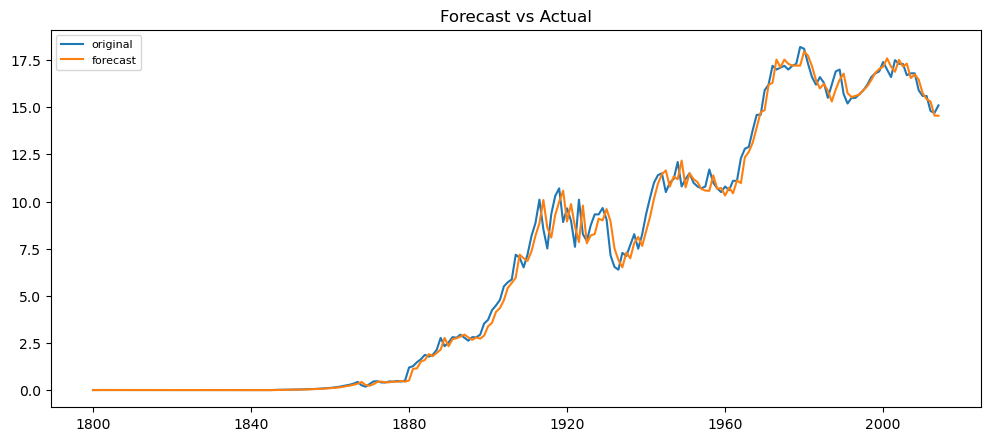

In [134]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(df, label='original')
plt.plot(final_arima.fittedvalues, label='forecast')
plt.title('Forecast vs Actual')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [135]:
#Forecasting for next 5 years

final_arima.forecast(5)


2015-01-01    14.771444
2016-01-01    14.554696
2017-01-01    14.496514
2018-01-01    14.452230
2019-01-01    14.489610
Freq: AS-JAN, Name: predicted_mean, dtype: float64

In [136]:
pred_5=final_arima.forecast(5)


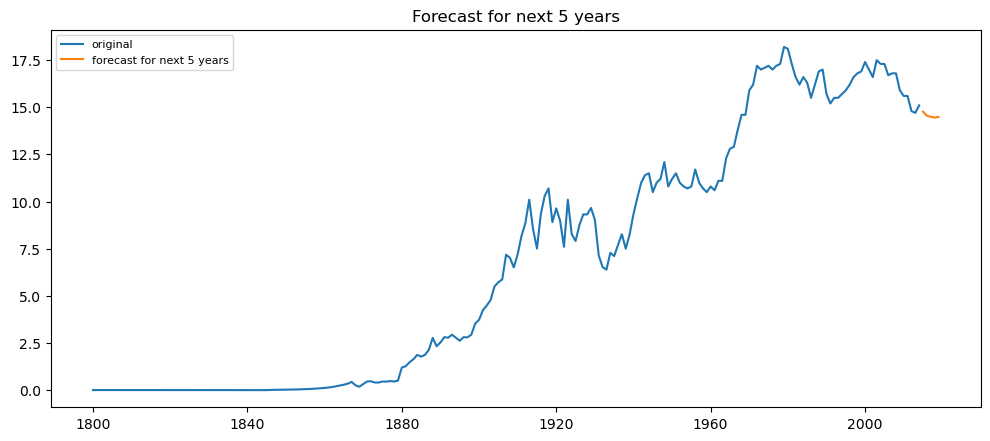

In [137]:
#plot 
#forecast for next 5 years

plt.figure(figsize=(12,5), dpi=100)
plt.plot(df, label='original')
plt.plot(pred_5, label='forecast for next 5 years')
plt.title('Forecast for next 5 years')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [138]:
#Forecasting for next 10 years

final_arima.forecast(10)

2015-01-01    14.771444
2016-01-01    14.554696
2017-01-01    14.496514
2018-01-01    14.452230
2019-01-01    14.489610
2020-01-01    14.575620
2021-01-01    14.718513
2022-01-01    14.903883
2023-01-01    15.124247
2024-01-01    15.366422
Freq: AS-JAN, Name: predicted_mean, dtype: float64

In [139]:
pred_10= final_arima.forecast(10)

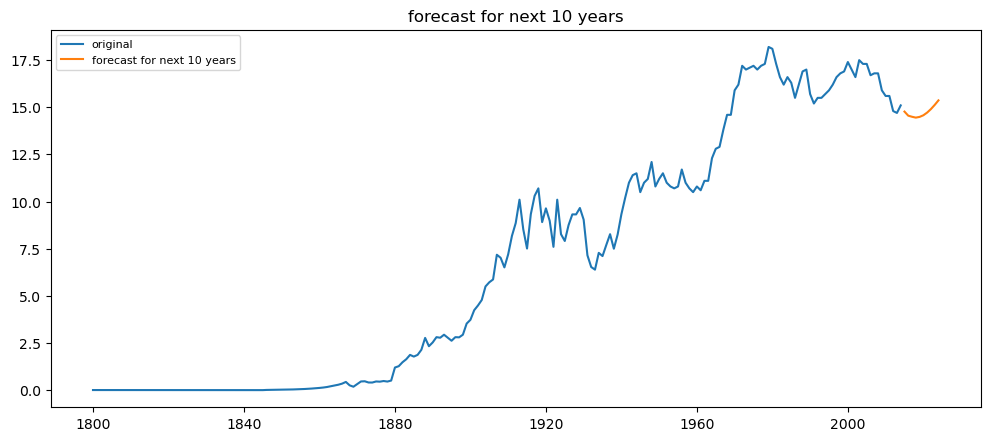

In [140]:
#plot 
#forecast for next 10 years

plt.figure(figsize=(12,5), dpi=100)
plt.plot(df, label='original')
plt.plot(pred_10, label='forecast for next 10 years')
plt.title('forecast for next 10 years')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [141]:
#Forecasting for next 20 years

final_arima.forecast(20)

2015-01-01    14.771444
2016-01-01    14.554696
2017-01-01    14.496514
2018-01-01    14.452230
2019-01-01    14.489610
2020-01-01    14.575620
2021-01-01    14.718513
2022-01-01    14.903883
2023-01-01    15.124247
2024-01-01    15.366422
2025-01-01    15.618137
2026-01-01    15.866008
2027-01-01    16.097442
2028-01-01    16.300729
2029-01-01    16.465880
2030-01-01    16.585001
2031-01-01    16.652714
2032-01-01    16.666371
2033-01-01    16.626159
2034-01-01    16.535032
Freq: AS-JAN, Name: predicted_mean, dtype: float64

In [142]:
pred_20=final_arima.forecast(20)

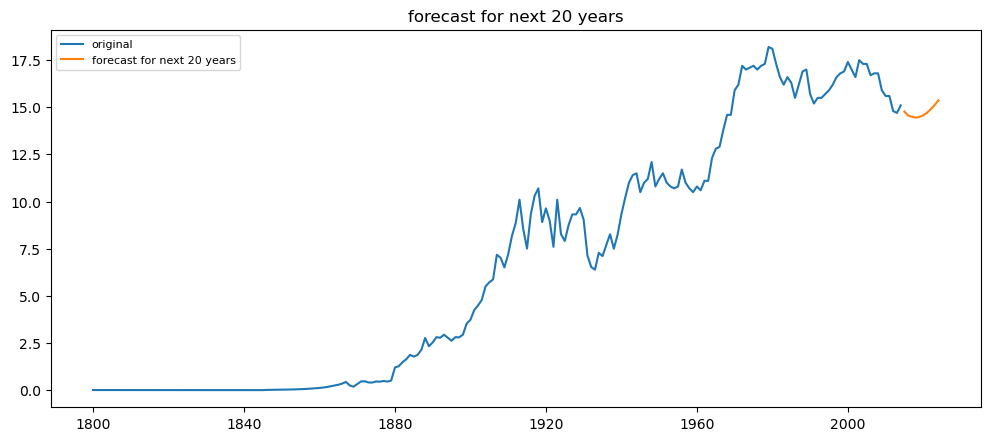

In [143]:
#plot 
#forecast for next 20 years

plt.figure(figsize=(12,5), dpi=100)
plt.plot(df, label='original')
plt.plot(pred_10, label='forecast for next 20 years')
plt.title('forecast for next 20 years')
plt.legend(loc='upper left', fontsize=8)
plt.show()